Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name and collaborators below:

In [1]:
NAME = "Evan"
COLLABORATORS = ""

---


# CS110 Spring 2020- Assignment 1
# Divide and Conquer Sorting Algorithms

This assignment focuses on the implementation of sorting algorithms and analyzing their performance both mathematically (using theoretical arguments on the asymptotic behavior of algorithms ) and experimentally (i.e., running experiments for different input arrays and plotting relevant performance results). 

Every CS110 assignment begins with a check-up on your class responsibilities and professional standing. If you have submitted make-up work, you will also receive formative feedback on it, accompanied by a grade reflecting on your ability to address one of the course LOs. Thus to complete the first part of this assignment, you will need to take a screenshot of your CS110 dashboard on Forum where the following is visible:

* your name.
* your absences for the course have been set to excused up to the last session from week 2 (inclusively) .

This will be evidence that you have submitted acceptable pre-class and make-up work for a CS110 session you may have missed. Please check the specific CS110 make-up and pre-class policies in the syllabus of the course.


**NOTES:**

1. Your assignment submission needs to include the following resources:

* A PDF file must be the first resource. This file must be generated from the template notebook where you have written all of the answers (check this [link](https://docs.google.com/document/d/1gRMol9Ebbvyu1mvEKzma92o_N7ZbNXsPIb1QdQV0TeE/edit#heading=h.10jakf1cwxpq) for instructions on how to do this). Make sure that the PDF displays properly (all text and code can be seen within the paper margins), and that your work is neat and clearly presented. 
* Your second resource must be the template notebook you have downloaded from the gist provided and where you included your answers. The name of this resource must include your own name. Submit this file directly following the directions in this picture:


<img src="images/upload.png" width="800" height="200">

If you are unable to submit the jupyter notebook directly, please compress all the materials of your submission, and submit the zip file as your second resource instead.

2. Tasks (1)-(7) will be graded on the indicated LOs; please make sure to consult their descriptions and rubrics in the course syllabus. You will not be penalized for not attempting the optional challenge.

3. In this first assignment, you will receive formative feedback on your reference, application and justification of the HCs but no actual grades. Only in subsequent assignments will the HCs applications be graded. This is an opportunity for you to deepen your argumentation skills without generating a grade. 

As such, after completing the assignment, evaluate the application of the HCs you have identified prior to and while you were working on this assignment and footnote them (refer to [these guidelines](https://docs.google.com/document/d/1s7yOVOtMIaHQdKLeRmZbq1gRqwJKfezBsfru9Q6PcHw/edit) on how to incorporate HCs in your work). 

Here are some examples of weak applications of some of the relevant HCs:

* Example 1: “#algorithms: I wrote an implementation of Bubble sort”. 
    * This is an extremely superficial use of the HC in a course on Algorithms, and your reference will be graded accordingly. Instead, consider what constitutes an algorithm (see Cormen et al., sections 1.1 and 1.2). Once you have a good definition of an algorithm, think of how this notion helped you approach the implementation of the algorithm, analyze its complexity and understand why it’s important to write an optimal Python implementation of the algorithm.

* Example 2: “#dataviz: I plotted nice curves showing the execution time of bubble sort, or I plotted beautiful curves with different colors and labels.”

    * Again, these two examples are very superficial uses of the HC #dataviz. Instead, consider writing down how do the plots and figures helped you interpret, analyze and write concluding remarks from your experiments. Or write about any insight you included in your work that came from being able to visualize the curves.


* Example 3: “#professionalism: I wrote a nice paper/article that follows all the directions in this assignment.” 

    * By now, you should realize that this is a poor application of the HC #professionalism. Instead, comment on how you actively considered the HC while deciding on the format, length, and style for writing your report.

4. Your code will be tested for similarity using Turnitin, both to other students’ work and examples available online. As such, be sure to cite all references that you used in devising your solution. Any plagiarism attempts will be referred to the ASC, as per the course’s policy in the syllabus.


** Complete the following tasks which will be graded in the designated LOs and foregrounded HCs (please consult the LOs rubrics on the syllabus):**

## Question 1. [HCs #responsibility; appropriate LO]

Submit a screenshot of your CS110 dashboard with the information described above. You can do this by writing:
```
from IPython.display import Image
Image(filename=’your_screenshot.png’)
```

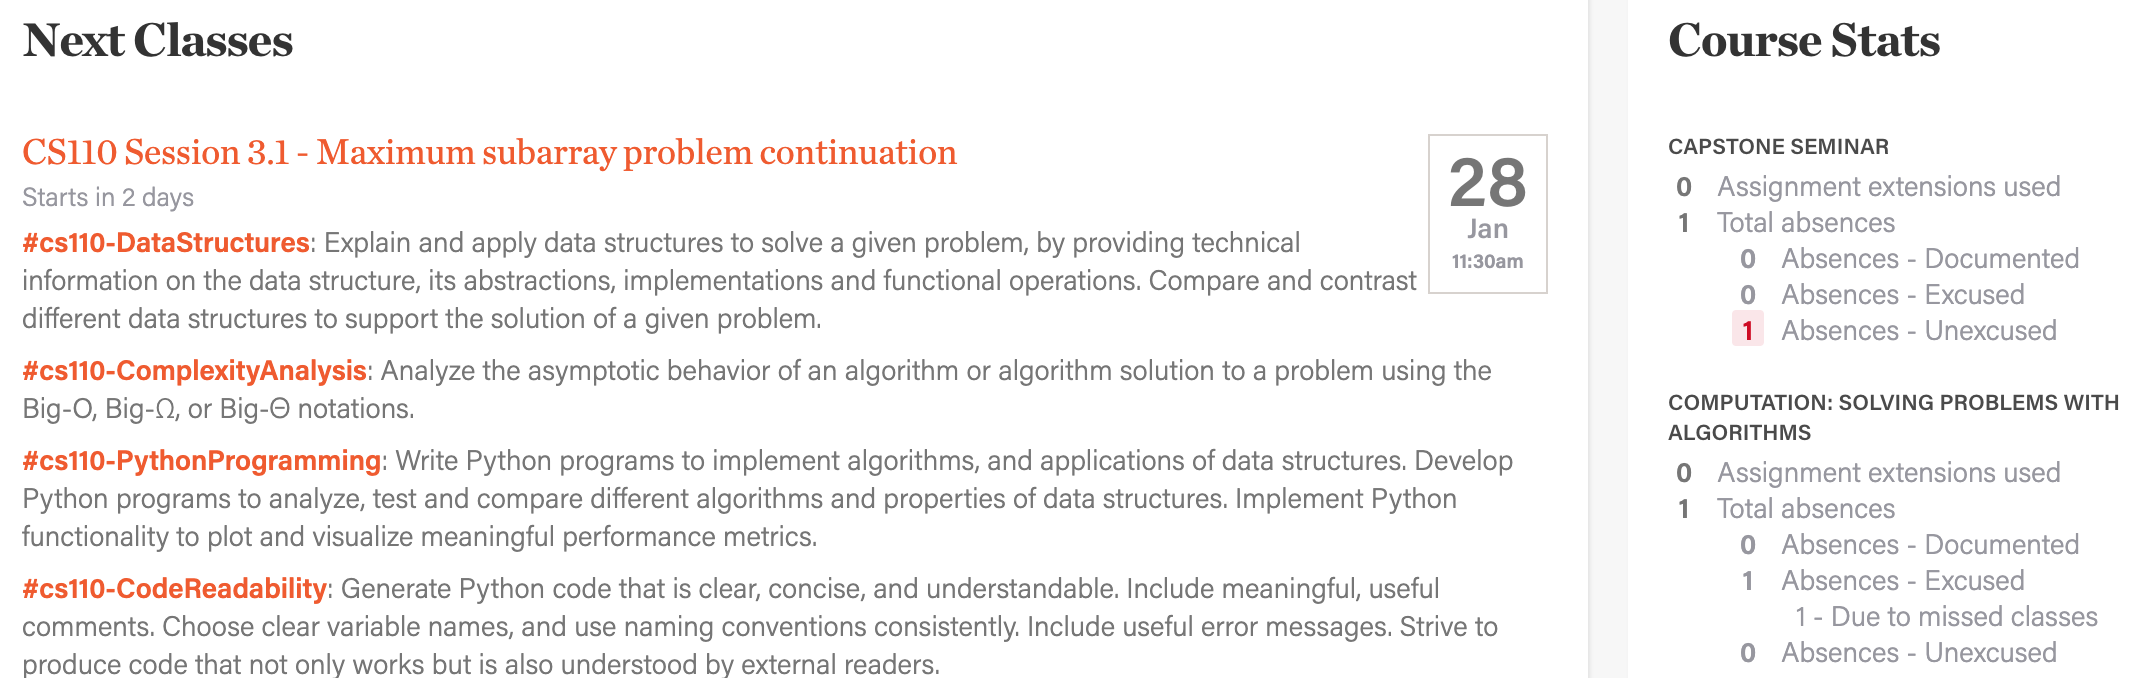

In [2]:
# YOUR CODE HERE
from IPython.display import Image

display(Image(filename='dash.png'))



In [3]:
import numpy as np
import math as m
import matplotlib.pyplot as plt

## Question 2. [#SortingAlgorithms, #PythonProgramming, #CodeReadability] 

Write a Python 3 implementation of the three-way merge sort algorithm discussed in class using the code skeleton below. You should also provide at least three test cases (possibly edge cases) that demonstrate the correctness of your code. Your output must be a sorted **Python list.**


In [4]:
def three_way_merge(arr):
    """Implements three-way marge sort
    
    Input:
    arr: a Python list OR numpy array (your code should work with both of these data types)
    
    Output: a sorted Python list"""
    # YOUR CODE HERE
    arr = list(arr)
    #Case of array with length 1, simply return the array
    if len(arr) == 1:
        return arr
   
    #Case of array with length 2, sort and return
    if len(arr)==2:
        if arr[0]>arr[1]:
            arr[0],arr[1]=arr[1],arr[0]
        return arr
    
    #Seperates array into 3 sub-arrays. This will create as many even arrays as possible
    #If arrays are not evenly divisible (Len(arr) %3 !=0), it will fill the rightmost array first
    #So an array of length 4 will be split ([a],[b],[c,d]) and an array of length 5 will be split ([a],[b],[c,d,e])
    n = len(arr)//3
    L = arr[:n]
    M = arr[n:2*n]
    R = arr[2*n:]
    #print(L,M,R)
    
    #Recurses the algorithm for each subarray of len > 1
    if len(L)>1:
        L = three_way_merge(L)
    if len(M)>1:
        M = three_way_merge(M) 
    if len(R)>1:
        R = three_way_merge(R) 
    
    #Markers to track sorting 
    i=j=k=h=0
    
    #While each of the three sub-arrays has elements left to assign to the array 
    while i < len(L) and j < len(M) and k < len(R):
        if L[i] < M[j]:
            if L[i] < R[k]:
                arr[h] = L[i]
                i +=1
                h +=1
            else:
                arr[h] = R[k]
                k+=1
                h+=1
        else:
            if M[j] < R[k]:
                arr[h] = M[j]
                j+=1
                h+=1
            else:
                arr[h] = R[k]
                k+=1
                h+=1
    
    #If only the left and middle sub-arrays have unplaced elements
    while i < len(L) and j < len(M):
        if L[i] < M[j]:
            arr[h] = L[i]
            i +=1
            h+=1
        else:
            arr[h] = M[j]
            j+=1
            h+=1

#If only the left and right sub-arrays have unplaced elements
    while i < len(L) and k < len(R):
        if L[i] < R[k]:
            arr[h] = L[i]
            i +=1
            h+=1
        else:
            arr[h] = R[k]
            k+=1
            h+=1
    
#If only the right and middle sub-arrays have unplaced elements
    while k < len(R) and j < len(M):
        if R[k] < M[j]:
            arr[h] = R[k]
            k +=1
            h+=1
        else:
            arr[h] = M[j]
            j+=1
            h+=1

#Conditions for only one sub-array left with unplaced elements
    while i < len(L):
        arr[h] = L[i]
        i +=1
        h+=1
    
    while j < len(M):
        arr[h] = M[j]
        j+=1
        h+=1
        
    while k < len(R):
        arr[h] = R[k]
        k+=1
        h+=1
    
   
    
    return arr    

In [5]:
three_way_merge([-9,4,3,9,25,9])

[-9, 3, 4, 9, 9, 25]

In [6]:
assert(three_way_merge([4,3,2,1]) == [1,2,3,4])
assert(three_way_merge(np.array([4,3,2,1])) == [1,2,3,4]) 

In [7]:
three_way_merge([99,4,-13,-9,-99,25,9])

[-99, -13, -9, 4, 9, 25, 99]

In [8]:
three_way_merge([99,4,-13,-9,-99,25,9,4])

[-99, -13, -9, 4, 4, 9, 25, 99]

## Question 3.  [#SortingAlgorithms, #PythonProgramming, #CodeReadability, #ComputationalCritique] 

Implement a second version of a three-way merge sort that calls bubble sort when sublists are below a certain length (of your choice) rather than continuing the subdivision process. Justify on the basis of theoretical and potentially also experimental arguments what might be an appropriate threshold for the input array for applying bubble sort.


In [9]:
def extended_three_way_merge(arr):
    """Implements the second version of a three-way merge sort
    
    Input:
    arr: a Python list OR numpy array (your code should work with both of these data types)
    
    Output: a sorted Python list"""
    #Case of array of len < 4 to be Bubble sorted
    arr = list(arr)

    
    #I chose to bubble sort all arrays with len<10 
    if len(arr) < 10:       
        return bubbleSort(arr)
   
    #Seperates array into 3 sub-arrays. This will create as many even arrays as possible
    #If arrays are not evenly divisible (Len(arr) %3 !=0), it will fill the rightmost array first
    #So an array of length 4 will be split ([a],[b],[c,d]) and an array of length 5 will be split ([a],[b],[c,d,e])
    n = len(arr)//3
    L = arr[:n]
    M = arr[n:2*n]
    R = arr[2*n:]
    #print(L,M,R)
    
    #Recurses the algorithm for each subarray of len > 1
    if len(L)>1:
        L = three_way_merge(L)
    if len(M)>1:
        M = three_way_merge(M) 
    if len(R)>1:
        R = three_way_merge(R) 
    
    #Markers to track sorting 
    i=j=k=h=0
    
    #While each of the three sub-arrays has elements left to assign to the array 
    while i < len(L) and j < len(M) and k < len(R):
        if L[i] < M[j]:
            if L[i] < R[k]:
                arr[h] = L[i]
                i +=1
                h +=1
            else:
                arr[h] = R[k]
                k+=1
                h+=1
        else:
            if M[j] < R[k]:
                arr[h] = M[j]
                j+=1
                h+=1
            else:
                arr[h] = R[k]
                k+=1
                h+=1
                
#If only the left and middle sub-arrays have unplaced elements    
    while i < len(L) and j < len(M):
        if L[i] < M[j]:
            arr[h] = L[i]
            i +=1
            h+=1
        else:
            arr[h] = M[j]
            j+=1
            h+=1
            
#If only the left and right sub-arrays have unplaced elements            
    while i < len(L) and k < len(R):
        if L[i] < R[k]:
            arr[h] = L[i]
            i +=1
            h+=1
        else:
            arr[h] = R[k]
            k+=1
            h+=1

#If only the right and middle sub-arrays have unplaced elements
    while k < len(R) and j < len(M):
        if R[k] < M[j]:
            arr[h] = R[k]
            k +=1
            h+=1
        else:
            arr[h] = M[j]
            j+=1
            h+=1
            
#Conditions for only one sub-array left with unplaced elements    
    while i < len(L):
        arr[h] = L[i]
        i +=1
        h+=1
    
    while j < len(M):
        arr[h] = M[j]
        j+=1
        h+=1
        
    while k < len(R):
        arr[h] = R[k]
        k+=1
        h+=1
     
    return arr        
    #raise NotImplementedError()

In [10]:
def bubbleSort(A):
    n=len(A)
    for i in range(n):
        swapped = False
        for j in reversed(range(i,n-1)):
            if A[j]>A[j+1]:
                A[j],A[j+1]=A[j+1],A[j]
                swapped = True
        if swapped == False:
            break
    return A

In [11]:
assert(extended_three_way_merge([4,3,2,1]) == [1,2,3,4])
assert(extended_three_way_merge(np.array([4,3,2,1])) == [1,2,3,4]) 

In [12]:
extended_three_way_merge([-9,4,3,9,25,9])

[-9, 3, 4, 9, 9, 25]

In [13]:
extended_three_way_merge([99,4,-13,-9,-99,25,9])

[-99, -13, -9, 4, 9, 25, 99]

In [14]:
extended_three_way_merge([99,4,-13,-9,-99,25,9,4])

[-99, -13, -9, 4, 4, 9, 25, 99]

## Question 4 [#SortingAlgorithms, #PythonProgramming, #CodeReadability] 

Bucket sort (or Bin sort) is an algorithm that takes as inputs an n-element array and the number of buckets, k, to be used during sorting.  Then, the algorithm distributes the elements of the input array into k-different buckets and proceeds to sort the individual buckets. Then, merges the sorted buckets to obtained the sorted array. Here is pseudocode for the BucketSort algorithm:

<img src="images/bucket.png" width="800" height="200">

The BucketSort code above calls the function GetBucketNum  (see the pseudocode below) to distribute all the elements of array A into k-buckets.  Every element in the array is assigned a bucket number based on its value (positive or negative numbers). GetBucketNum returns the bucket number that corresponds to element A[i].   It takes as inputs the element of the array, A[i], the max and min elements in A, the size of the intervals in every bucket (e.g., if you have numbers with values between  0 and 100 numbers and 5 buckets, every bucket has an interval of size 20 = [100-0]/5).  Notice that in pseudocode, the indices of the arrays are from 1 to n. Thus, GetBucketNum consistently returns a number between 1 and n (make sure you account for this in your Python program).


<img src="images/getbucketnum.png" width="800" height="200">

Write a Python 3 implementation of BucketSort that uses the bubble sort algorithm for sorting the individual buckets in line 10 of the algorithm.

In [15]:
#To be used in bucket_sort
#This function takes in a tracker which is initialized to [0,0,0,...,0] (with k elements) 
#and buckets, which is a bubble sorted array of bucket arrays 
#it then checks which of the lowest unplaced elements in each subarray in buckets is the lowest 
#it returns that lowest value, along with its index

def get_min_value(tracker, buckets):
    min_trace = (float("inf"), None)
    
    for i in range(len(tracker)):
        try:
#This line looks up the element in bucket i at the index corresponding to the value of the tracker
#e.g. if i = 1, and the tracker = [0,1,1], it compare take the 2nd item in the 2nd bucket with the standing min.
            if buckets[i][tracker[i]] <  min_trace[0]:  
                min_trace = (buckets[i][tracker[i]], i)
        except:
            pass
    return min_trace

In [16]:
def bucket_sort(arr, k=3):
    """Implements BucketSort
    
    Input:
    arr: a Python list OR numpy array (your code should work with both of these data types)
    k: int, number of buckets
    
    Output: a sorted Python list"""
    # YOUR CODE HERE
    
    #These lines ensure that a valid k is given, one that is a positive integer
    try: 
        if k<1 or type(k) is not int:
            print("k must be a positive integer")
    except:
        print("k must be a positive integer")
    
    #Convert np.array into a list
    arr = list(arr)
    
    #Initialize the tracker 
    tracker = [0 for _ in range(int(k))]
    #Create an list of k empty lists
    buckets = [[] for _ in range(k)]
    
    #Iterates through all given items and spreads them 1 by 1 into each empty bucket such that 
    # a list with 5 elements and k buckets will be split as follows --> ([1,4],[2,5],[3])
    for i in range(0,len(arr)):
        buckets[i%k].append(arr[i])

    #Bubblesorts each of the buckets
    buckets = [(bubbleSort(buckets[i])) for i in range(k)]

    #This then merges the buckets using get_min_value() to identify the next lowest elemnt
    for i in range(len(arr)):
        min_value, index = get_min_value(tracker, buckets)
        arr[i] = (min_value)
        tracker[index] += 1

    return arr
    
    raise NotImplementedError()

In [17]:
bucket_sort([6,3,2,7,4],9)

[2, 3, 4, 6, 7]

In [18]:
bucket_sort([6,3,2,7,4],1)

[2, 3, 4, 6, 7]

In [19]:
bucket_sort([99,4,-13,-9,-99,25,9,4],3)

[-99, -13, -9, 4, 4, 9, 25, 99]

In [20]:
assert(bucket_sort([4,3,2,1],3) == [1,2,3,4])
assert(bucket_sort(np.array([4,3,2,1]),3) == [1,2,3,4])

In [21]:
assert(bucket_sort([4,3,2,1], 1) == [1,2,3,4])
assert(bucket_sort(np.array([4,3,2,1]), 1) == [1,2,3,4])
assert(bucket_sort([4,3,2,1], 3) == [1,2,3,4])
assert(bucket_sort(np.array([4,3,2,1]), 3) == [1,2,3,4])

In [22]:
assert(bucket_sort([4,3,2,1]) == [1,2,3,4])
assert(bucket_sort(np.array([4,3,2,1])) == [1,2,3,4])

## Question 5 [#SortingAlgorithms, #PythonProgramming, #CodeReadability]

Implement a second version of the BucketSort algorithm. This time in line 10 of BucketSort apply the Bucket sort algorithm recursively until the size of the bucket is less than or equal to k, the base case (notice that fewer than k partitions will be inefficient).


In [23]:
def extended_bucket_sort(arr, k=3):
    """Implements the second version of the BucketSort algorithm
    
    Input:
    arr: a Python list OR numpy array (your code should work with both of these data types)
    k: int, number of buckets
    
    Output: a sorted Python list"""
    # YOUR CODE HERE
    arr = list(arr)
    #Case of array with length 1, simply return the array
    if len(arr) == 1:
        return arr
   
    #Case of array with length 2, sort and return
    if len(arr)==2:
        if arr[0]>arr[1]:
            arr[0],arr[1]=arr[1],arr[0]
        return arr 
    
    
    #These lines ensure that a valid k is given, one that is a positive integer
    try: 
        if k<1 or type(k) is not int:
            print("k must be a positive integer")
    except:
        print("k must be a positive integer")
    
    #Convert np.array into a list
    arr = list(arr)

    #Initialize the tracker 
    tracker = [0 for _ in range(int(k))]
    #Create an list of k empty lists
    buckets = [[] for _ in range(k)]
    
    n = len(arr)
    s = m.ceil(n/k)
    if k >1:
        if n > k:
            for i in range(k):
                buckets[i] = extended_bucket_sort(arr[i*s:(i+1)*s],k)
        else:
            bubbleSort(arr)
            return arr
    
    #With K=1, return bubblesorted array
    else:
        bubbleSort(arr)
        return arr 
    
    #Merge using get_min_value()
    tracker = [0 for _ in range(int(k))]
    for i in range(len(arr)):
        min_value, index = get_min_value(tracker, buckets)
        arr[i] = (min_value)
        tracker[index] += 1 
    
    return arr
    raise NotImplementedError()

In [24]:
extended_bucket_sort([8,5,-99,-44,-33,3,4,7,9,2,6,9,33,92,93,4], 50)

[-99, -44, -33, 2, 3, 4, 4, 5, 6, 7, 8, 9, 9, 33, 92, 93]

In [25]:
assert(extended_bucket_sort([4,3,2,1]) == [1,2,3,4])
assert(extended_bucket_sort(np.array([4,3,2,1])) == [1,2,3,4])

In [26]:
assert(extended_bucket_sort([4,3,2,1], 1) == [1,2,3,4])
assert(extended_bucket_sort(np.array([4,3,2,1]), 1) == [1,2,3,4])
assert(extended_bucket_sort([4,3,2,1], 3) == [1,2,3,4])
assert(extended_bucket_sort(np.array([4,3,2,1]), 3) == [1,2,3,4])

In [27]:
#Mergesort to be used in runtime analysis

def merge_sort(A):
    mid = len(A)//2
    if len(A)>1:
        L = A[:mid]
        R = A[mid:]
        merge_sort(L)
        merge_sort(R)
        #Running merge() code here, rather than having a seperate function
        i=j=k=0
        while i<len(L) and j<len(R):
            if L[i]<R[j]:
                A[k]=L[i]
                i+=1
            else:
                A[k]=R[j]
                j+=1
            k+=1
            
        while i<len(L):
            A[k]=L[i]
            i+=1
            k+=1
            
        while j<len(R):
            A[k]=R[j]
            j+=1
            k+=1
        
    return(A)

## Question 6 [#ComplexityAnalysis, #ComputationalCritique] 

Analyze and compare the practical run times of regular merge sort (i.e., two-way merge sort), three-way merge sort, and the augmented merge sort from (3) by producing a plot that illustrates how every running time grows with input size. Make sure to:

1. define what each algorithm's complexity is
2. enumerate the explicit assumptions made to assess each run time of the algorithm's run time.
3. and compare your benchmarks with the theoretical result we have discussed in class.


### ANSWER

1. The complexity of merge sort is Big-Theta(nlogn) where log(n) is height of the recursive tree and accounts for the steps it will take to run through that recursion, and n is the linear complexity required to merge the sub-arrays (or more accurately c*n, where c is a constant defined by the implementation of the algorithm)

For two way mergesort, we have log-base-2 of n, and for the three way mergesort(s) we have log-base-3 of n. As such we expect the three way mergesorts to have a shorter runtime, because for arrays of equivalent lengths they will have shorter recursion trees. 

The following are simulations and plots comparing these three algorithms against one another.

In [28]:
# YOUR CODE HERE
import time
import random
import matplotlib.pyplot as plt

#Timer function to be used in runtime analysis, it runs the specified algorithm on the input array, 
#and returns the time taken to run the algorithm. Note that this is only taking a single instance of
#each case, a more robust function would run the simulation many times and take an average value. 

#Because I use raw time for the computation, the results seen in the following plots are sensitive to 
#my computer, and if I were to open another tab, or recieve a message while the simulations are running, 
#it might create a spike in the runtime graph. This was all taken into consideration when interpreting the 
#following results. 

def timer_function(input_array, alg,k=3):
    if alg == "2MS":
        start_time = time.time()
        merge_sort(input_array)
        stop_time = time.time()
    elif alg == "3MS":
        start_time = time.time()
        three_way_merge(input_array)
        stop_time = time.time()
    elif alg == "3aMS":
        start_time = time.time()
        extended_three_way_merge(input_array)
        stop_time = time.time()
    elif alg == "BS":
        start_time = time.time()
        bucket_sort(input_array,k)
        stop_time = time.time()
    elif alg == "EBS":
        start_time = time.time()
        extended_bucket_sort(input_array,k)
        stop_time = time.time()  
    elif alg == "BBS":
        start_time = time.time()
        bubbleSort(input_array)
        stop_time = time.time()  
    
    return stop_time - start_time


#raise NotImplementedError()

In [29]:
#Two way, three way, and extended three way mergesort simulation
tms, twms, tams = [], [], []
input_sizes = []

for i in range(1,10001,100):
    input_size = i
    input_sizes.append(input_size)
    array = [random.randint(-100000, 100000) for _ in range(input_size)]
    tms.append(timer_function(array,"2MS"))
    twms.append(timer_function(array,"3MS"))
    tams.append(timer_function(array,"3aMS"))

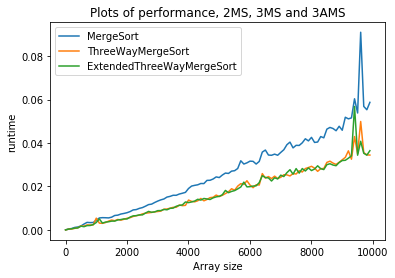

In [30]:
#Two way, three way, and extended three way mergesort plotting
plt.title('Plots of performance, 2MS, 3MS and 3AMS')
plt.ylabel("runtime")
plt.xlabel("Array size")
MergeSort = plt.plot(input_sizes, tms,label = "MergeSort")
ThreeWayMergeSort = plt.plot(input_sizes, twms)
ExtendedThreeWayMergeSort = plt.plot(input_sizes, tams)
plt.gca().legend(("MergeSort","ThreeWayMergeSort","ExtendedThreeWayMergeSort"))

plt.show()

We can see the results are as expected, that the three way mergesort runs much more efficiently than the two way mergesort.

## Question 7. [#ComplexityAnalysis, #ComputationalCritique] 

Analyze and compare the practical run times of regular merge sort (i.e., two-way merge sort), Bucket sort, and extended_bucket_sort by producing a plot that illustrates how the algorithms' runtimes depend on both the input size and the nature of the input (e.g., totally randomized inputs vs inversely sorted inputs). Make sure to:

1. define what each algorithm's complexity is in terms of the BigO notation
2. enumerate the explicit assumptions made to assess each algorithm's run time
3. analyze the running times on inputs of at least three different natures
4. and compare your benchmarks with the theoretical result we have discussed in class.


### Answer

Mergesort is described above. Buckets Sort runs on O(n+k) complexity run time. This is because it takes an order of k steps to split the array into k buckets, and then it also takes an order of n steps to sort the buckets and merge them. The way I've implemented the extended bucket sort is not very efficient, and so I expect it to take much longer than the other algoritms. 


In [31]:
#two way mergesort, bucket sort, and extended bucket sort simulation
tms, tbs, tebs = [], [], []
input_sizes = []

for i in range(1,10001,100):
    input_size = i
    input_sizes.append(input_size)
    array = [random.randint(-10000, 10000) for _ in range(input_size)]
    tms.append(timer_function(array,"2MS"))
    tbs.append(timer_function(array,"BS",3))
    tebs.append(timer_function(array,"EBS",3))


#raise NotImplementedError()

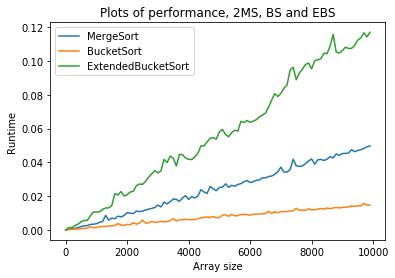

In [32]:
#two way mergesort, bucket sort, and extended bucket sort plotting
plt.title('Plots of performance, 2MS, BS and EBS')
plt.ylabel("Runtime")
plt.xlabel("Array size")
MergeSort = plt.plot(input_sizes, tms,label = "MergeSort")
BucketSort = plt.plot(input_sizes, tbs)
ExtendedBucketSort = plt.plot(input_sizes, tebs)
plt.legend(("MergeSort","BucketSort","ExtendedBucketSort"))

plt.show()

My assumptions were correct in that bucketsort runs more effeciently than mergesort, yet the extended bucketsort is inneficient. This provides evidence towards the complexities as described: merge = Theta(nlogn), bucket = O(n+k) 

Since it is often the case that the algorithms behave differently in edge cases, I took a closer look at run times for small arrays

In [33]:
#two way mergesort, bucket sort, and extended bucket sort simulation

tms, tbs, tebs = [], [], []
input_sizes = []

for i in range(1,41,1):
    input_size = i
    input_sizes.append(input_size)
    array = [random.randint(-10000, 10000) for _ in range(input_size)]
    tms.append(timer_function(array,"2MS"))
    tbs.append(timer_function(array,"BS",3))
    tebs.append(timer_function(array,"EBS",3))


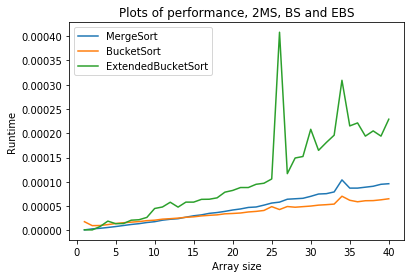

In [34]:
#two way mergesort, bucket sort, and extended bucket sort plotting

plt.title('Plots of performance, 2MS, BS and EBS')
plt.ylabel("Runtime")
plt.xlabel("Array size")
MergeSort = plt.plot(input_sizes, tms,label = "MergeSort")
BucketSort = plt.plot(input_sizes, tbs)
ExtendedBucketSort = plt.plot(input_sizes, tebs)
plt.gca().legend(("MergeSort","BucketSort","ExtendedBucketSort"))

plt.show()

We can see that for small arrays (~<10) mergesort actually runs more efficiently than bucket sort, as the complexities described are specific to arrays over this minimum threshold

## [Optional challenge] Question 8 (#SortingAlgorithm and/or #ComputationalCritique) 

Implement k-way merge sort, where the user specifies k. Develop and run experiments to support a hypothesis about the “best” value of k.


In [35]:
# YOUR CODE HERE
def any_k_bucket_sort(k=int(input("Specify K"))):
    array = [random.randint(-100000, 100000) for _ in range(100)]
    end = bucket_sort(array,k)
    return print(end)

any_k_bucket_sort()
#raise NotImplementedError()

Specify K 9


[-99822, -98215, -93833, -93536, -93324, -91449, -89388, -88936, -86028, -83506, -76529, -73942, -71179, -70276, -68708, -68565, -66526, -62280, -61365, -59384, -58783, -58075, -57704, -56139, -56083, -53233, -52132, -51213, -50882, -48524, -47473, -45610, -45161, -44123, -38825, -37531, -34666, -34665, -32748, -28910, -24187, -23432, -23136, -20303, -18722, -15895, -14420, -10834, -6815, -4340, -365, -230, 1176, 1290, 2315, 4374, 7733, 8153, 10968, 15370, 15371, 18876, 19892, 20289, 20682, 20837, 21305, 23345, 24014, 26135, 28561, 28689, 34185, 36904, 40686, 42057, 42648, 42651, 55379, 59949, 68462, 70329, 71953, 73153, 75703, 75804, 76601, 78557, 78764, 81462, 81476, 82120, 86097, 87640, 89230, 91442, 91536, 92913, 93956, 94546]


In [36]:
#Simulation for bucket sort with k varying from 1 to 10
tbs = [[] for _ in range(10)]
input_sizes = []

for k in range(1,11):
    for i in range(1,2001,100):
        input_size = i
        input_sizes.append(input_size)
        array = [random.randint(-10000, 10000) for _ in range(input_size)]
        tbs[k-1].append(timer_function(array,"BS",k))

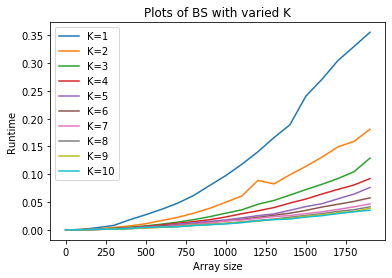

In [37]:
#Ploting
plt.title('Plots of BS with varied K')
plt.ylabel("Runtime")
plt.xlabel("Array size")
input_sizes = []
for i in range(1,2001,100):
    input_sizes.append(i)
    

plt.plot(input_sizes, tbs[0], label = "K=1")
plt.plot(input_sizes, tbs[1],label = "K=2")
plt.plot(input_sizes, tbs[2], label = "K=3" )
plt.plot(input_sizes, tbs[3], label = "K=4" )
plt.plot(input_sizes, tbs[4], label = "K=5")
plt.plot(input_sizes, tbs[5], label = "K=6")
plt.plot(input_sizes, tbs[6], label = "K=7")
plt.plot(input_sizes, tbs[7], label = "K=8")
plt.plot(input_sizes, tbs[8], label = "K=9") 
plt.plot(input_sizes, tbs[9], label = "K=10")

plt.gca().legend(loc = "upper left")
plt.show()


We can see that the runtime decreases as k increases. The question is how far will it decrease relative to the input size. 

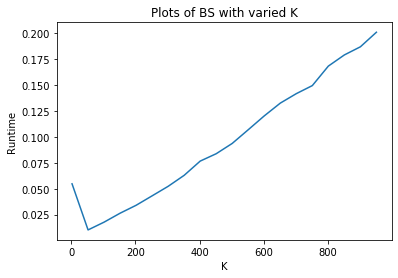

In [38]:
#Plotting runtime for many K with single list of len = 1000
array = [random.randint(-10000, 10000) for _ in range(1000)]

results=[]

#Guessing that the optimal k value will be somewhere between 2 and 50 (Note that k=1 is just mergesort)
for k in range(2,len(array),50):
    results.append(timer_function(array,"BS",k))
input_sizes = []    
for i in range(2,len(array),50):
    input_sizes.append(i)

    
plt.title('Plots of BS with varied K')
plt.ylabel("Runtime")
plt.xlabel("K")
plt.plot(input_sizes, results)
plt.show()

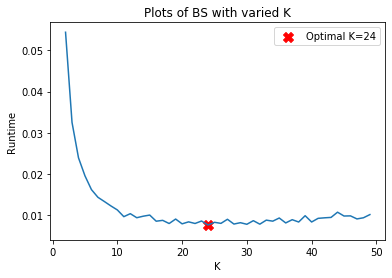

In [39]:
#Since the optimal run time was clearly somewhere under 100, 
#I took a more fine grained look at that portion of the plot  
array = [random.randint(-10000, 10000) for _ in range(1000)]

k_sizes = []    
results=[]
for k in range(2,50):
    results.append(timer_function(array,"BS",k))
    k_sizes.append(k)  

min_run_time = min(results)
for i in range(len(k_sizes)):
    if results[i] == min_run_time:
        min_k = k_sizes[i]
        break

plt.plot(k_sizes, results)
plt.title('Plots of BS with varied K')
plt.xlabel("K")
plt.ylabel("Runtime")
plt.scatter(min_k, min_run_time,marker = "X", color = "RED",s = 100, label =f"Optimal K={(min_k)}" )
plt.gca().legend(loc = "upper right")
plt.show()

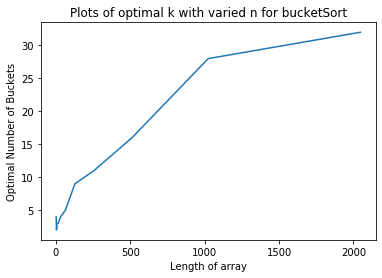

In [40]:
#With a clearly identified K for the single list of len 1000, 
#I decided to investigate optimal k for varied list lengths


n_sizes = [] 
optimal_k=[]
for n in np.logspace(1,11,base=2,num=11): #Logarithmic scaling of array lengths (n)
    n_sizes.append(n)
    array = [random.randint(-10000, 10000) for _ in range(int(n))]
    runtimes=[]
    for k in range(2,50):
        runtimes.append(timer_function(array,"BS",k))
    min_run_time = min(runtimes)
    for i in range(len(k_sizes)):
        if runtimes[i] == min_run_time:
            optimal_k.append(k_sizes[i])
            break

            
plt.title('Plots of optimal k with varied n for bucketSort')
plt.xlabel("Length of array")
plt.ylabel("Optimal Number of Buckets")
plt.plot(n_sizes,optimal_k)
plt.show()


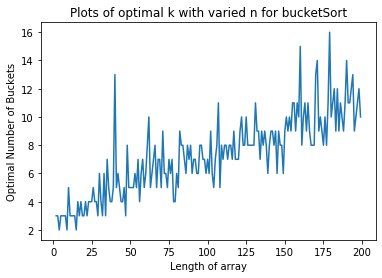

In [41]:
#The plot above clearly shows a logarithmic relationship between array size and optimal k
#As expected, there is some divergent behaviour with very small arrays. The following plot explores this
#and shows how sensitive the runtime is to the specific random inputs of the array, however we do see
#averagely increasing optimal_k in a linear order over increasing array length 

k_sizes = []    
for i in range(2,50):
    k_sizes.append(i)

n_sizes = [] 
optimal_k=[]
for n in range(2,200):
    n_sizes.append(n)
    array = [random.randint(-10000, 10000) for _ in range(int(n))]
    runtimes=[]
    for k in range(2,50):
        runtimes.append(timer_function(array,"BS",k))
    min_run_time = min(runtimes)
    for i in range(len(k_sizes)):
        if runtimes[i] == min_run_time:
            optimal_k.append(k_sizes[i])
            break

plt.title('Plots of optimal k with varied n for bucketSort')
plt.xlabel("Length of array")
plt.ylabel("Optimal Number of Buckets")
plt.plot(n_sizes,optimal_k)
plt.show()


### Apendix

Extra analysis of bubble sort vs merge sort. Surprisingly, the bubblesort seems to be very efficient compared to the mergesort and both appear to run on linearly expanding time relative to the size of the array.  

In [42]:
#Bubble Sort vs Merge Sort 1000 Simulation
tms, tbbs  = [], []
input_sizes = []


for i in range(1,10001,100):
    input_size = i
    input_sizes.append(input_size)
    array = [random.randint(-100000, 100000) for _ in range(input_size)]
    tms.append(timer_function(array,"2MS"))
    tbbs.append(timer_function(array,"BBS"))


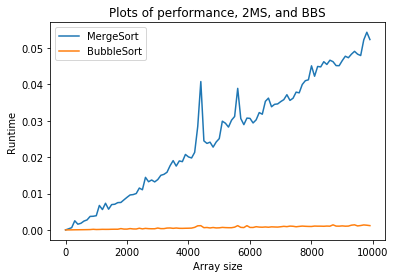

In [43]:
#Bubble Sort vs Merge Sort 1000 Plotting
plt.title('Plots of performance, 2MS, and BBS')
plt.ylabel("Runtime")
plt.xlabel("Array size")
MergeSort = plt.plot(input_sizes, tms,label = "MergeSort")
BubbleSort = plt.plot(input_sizes, tbbs)
plt.gca().legend(("MergeSort","BubbleSort"))
plt.show()

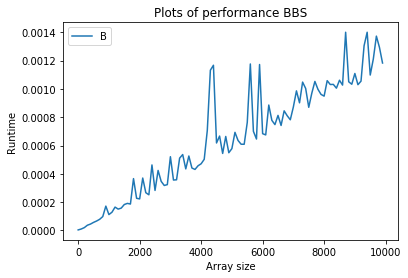

In [44]:
#The bubblesort line looks almost flat, this plot is to show that it actually does have linearly increasing runtimes

plt.title('Plots of performance BBS')
plt.ylabel("Runtime")
plt.xlabel("Array size")
BubbleSort = plt.plot(input_sizes, tbbs)
plt.gca().legend(("BubbleSort"))
plt.show()

In [45]:
#Bubble Sort vs Merge Sort 100 Simulation

tms, tbbs  = [], []
input_sizes = []


for i in range(1,100):
    input_size = i
    input_sizes.append(input_size)
    array = [random.randint(-100000, 100000) for _ in range(input_size)]
    tms.append(timer_function(array,"2MS"))
    tbbs.append(timer_function(array,"BBS"))


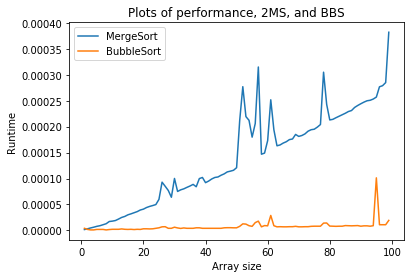

In [46]:
#Bubble Sort vs Merge Sort Plotting

plt.title('Plots of performance, 2MS, and BBS')
plt.ylabel("Runtime")
plt.xlabel("Array size")
MergeSort = plt.plot(input_sizes, tms,label = "MergeSort")
BubbleSort = plt.plot(input_sizes, tbbs)
plt.gca().legend(("MergeSort","BubbleSort"))
plt.show()